In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Question 1: Read the Bike Details dataset into a Pandas DataFrame and <p> display its first 10 rows. (Show the shape and column names as well.)

In [2]:
# Load the dataset

df=pd.read_csv("BIKE DETAILS.csv")

#first 10 rows
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [3]:
#shape of dataset

df.shape
df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [4]:
#column names
column_name=df.columns.tolist()
column_name

['name',
 'selling_price',
 'year',
 'seller_type',
 'owner',
 'km_driven',
 'ex_showroom_price']

In [5]:
# statistical measure of data

df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [6]:
# data types of columns

df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

#### Question 2: Check for missing values in all columns and describe your <br> approach for handling them...

In [7]:
# checking missing value in all columns

df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [8]:
# replacing the nan value with the median

df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

In [22]:
# after replaicng null values

df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

#### Question 3: Plot the distribution of selling prices using a histogram<br>and describe the overall trend.

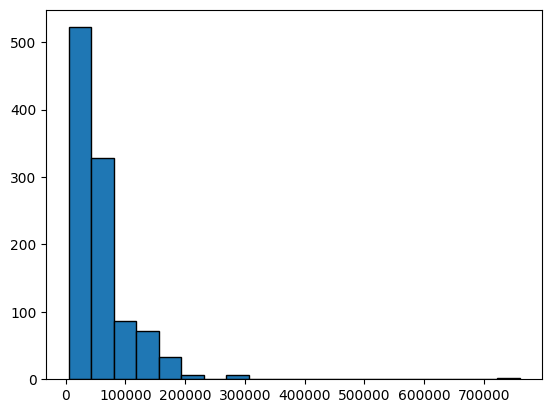

In [9]:
plt.hist(df['selling_price'],bins=20,edgecolor='black')
plt.show()

#### Question 4: Create a bar plot to visualize the average selling price <br> for each seller type and write one observation 

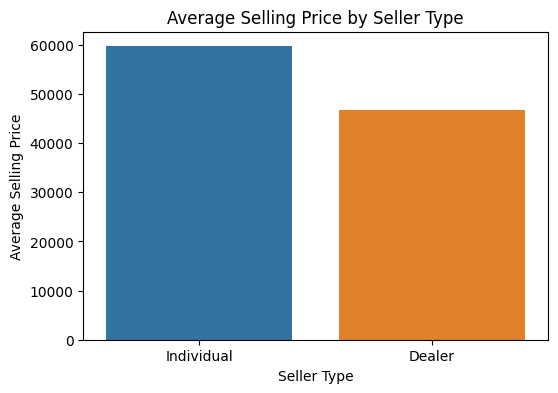

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(x="seller_type", y="selling_price", data=df, estimator="mean", errorbar=None)
plt.title("Average Selling Price by Seller Type")
plt.ylabel("Average Selling Price")
plt.xlabel("Seller Type")
plt.show()

####  Question 5: Compute the average km_driven for each ownership type <br> (1st owner,2nd owner etc., and present result in bar plot 

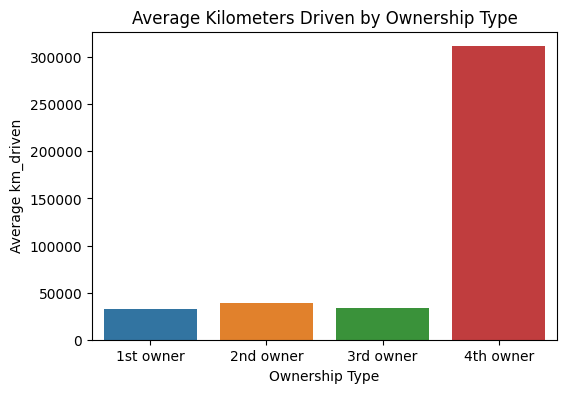

In [11]:
# Group data by ownership and aggregate the average
avg_km = df.groupby("owner")["km_driven"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x="owner", y="km_driven", data=avg_km)
plt.title("Average Kilometers Driven by Ownership Type")
plt.ylabel("Average km_driven")
plt.xlabel("Ownership Type")
plt.show()

#### Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before & after summary statistics. 

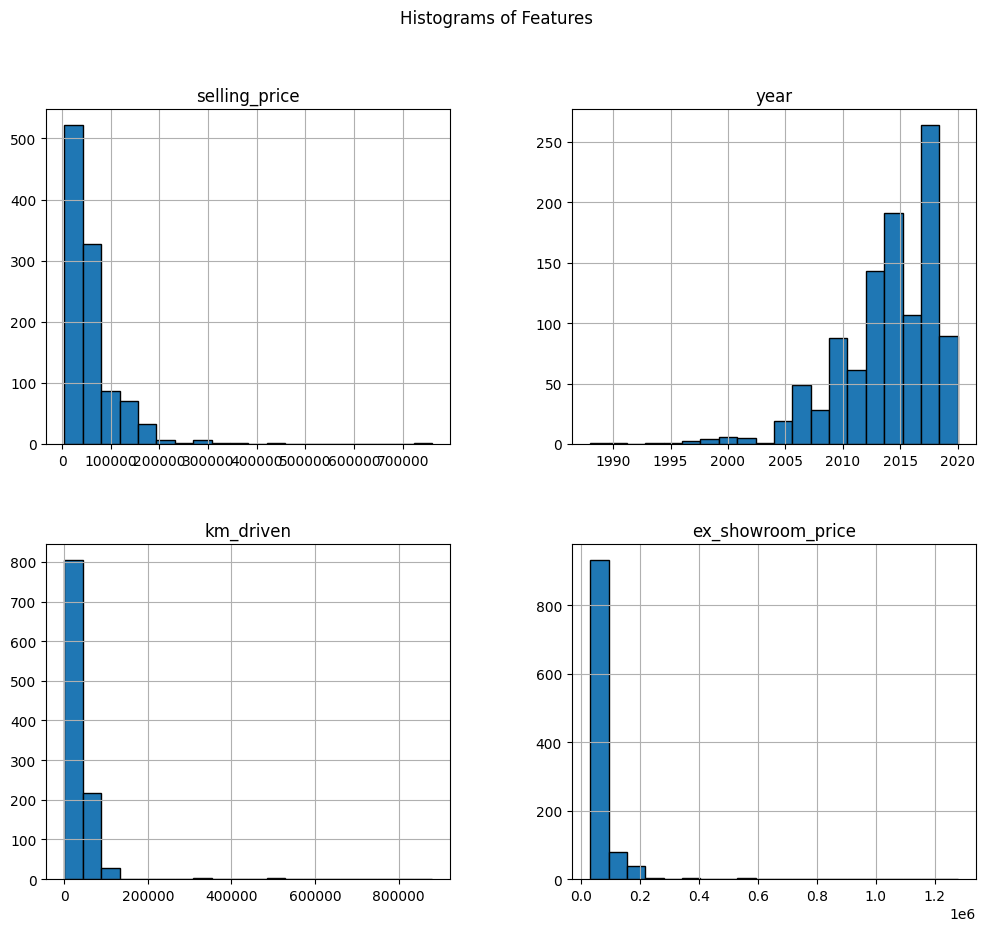

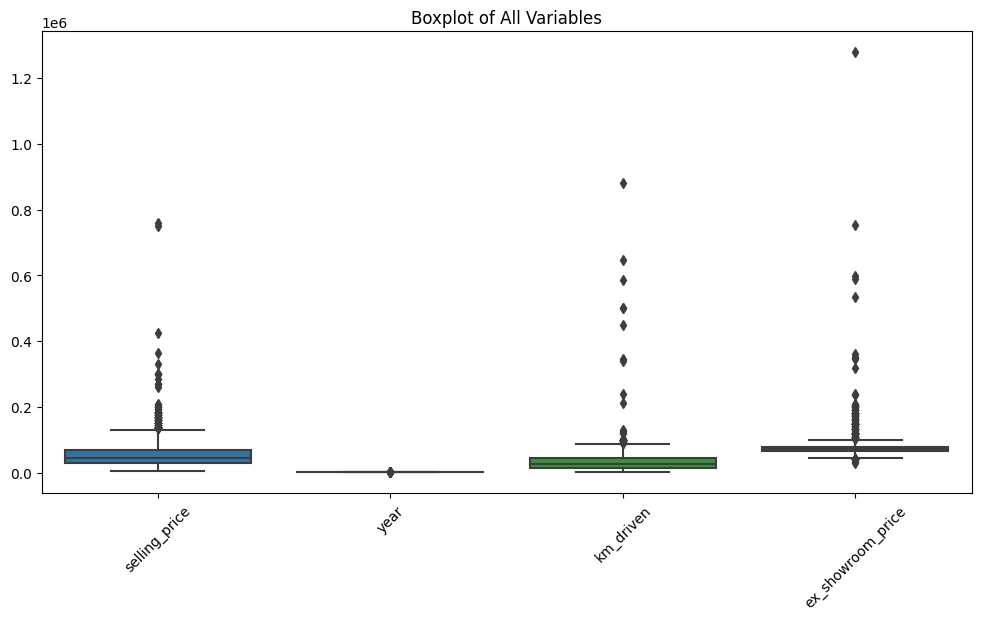

In [12]:
# plot to see the how the distribution is

# Histograms & KDE
df.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Features")
plt.show()

# Boxplots (outlier detection)
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of All Variables")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cols = ["selling_price",	"year", "km_driven","ex_showroom_price"]
#df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
df[scaled_cols]=scaler.fit_transform(df[scaled_cols])

In [23]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,1.303567,1.193928,Individual,1st owner,-0.659120,-0.149661
1,Honda Dio,-0.260105,0.728722,Individual,1st owner,-0.556405,-0.149661
2,Royal Enfield Classic Gunmetal Grey,1.303567,0.961325,Individual,1st owner,-0.433340,0.294836
3,Yamaha Fazer FI V 2.0 [2016-2018],0.095275,0.263515,Individual,1st owner,-0.220157,0.132094
4,Yamaha SZ [2013-2014],-0.704331,-0.666899,Individual,2nd owner,-0.258917,-0.149661


In [15]:
# Outlier detection using IQR
def treat_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

for col in scaled_cols:
    treat_outliers(col)

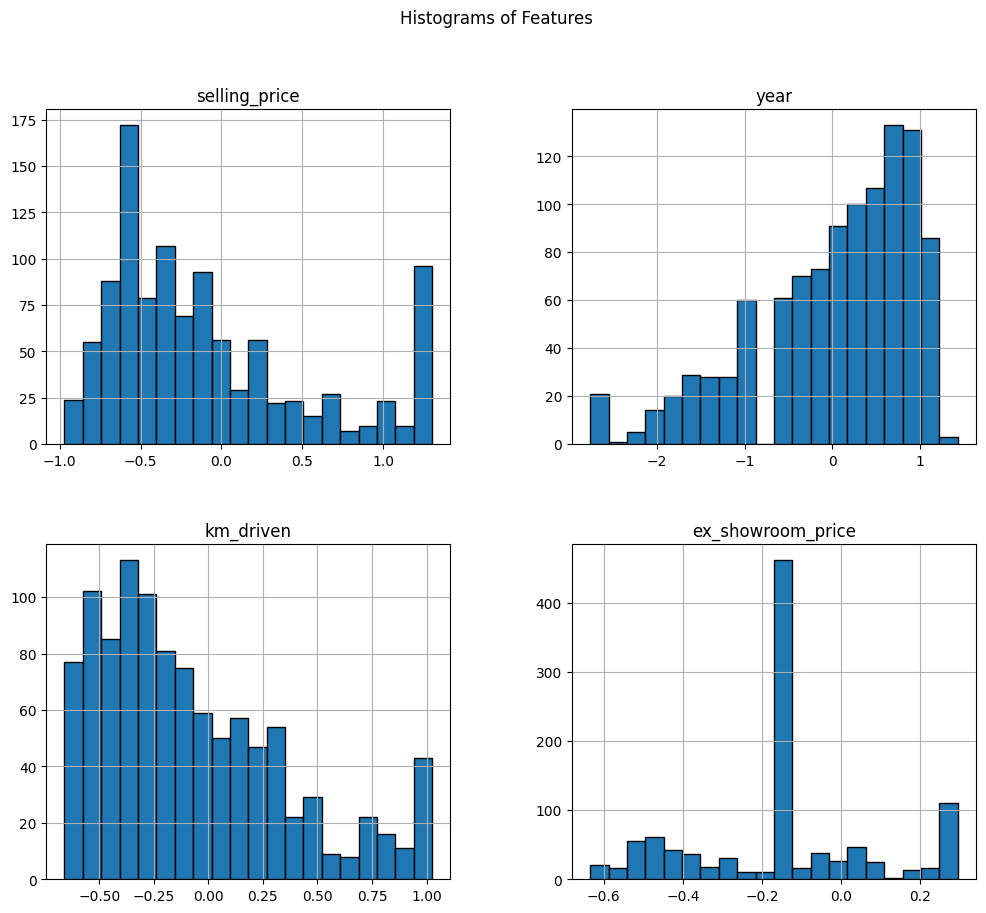

In [27]:
# Boxplots (outlier detection)
df.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Features")
plt.show()


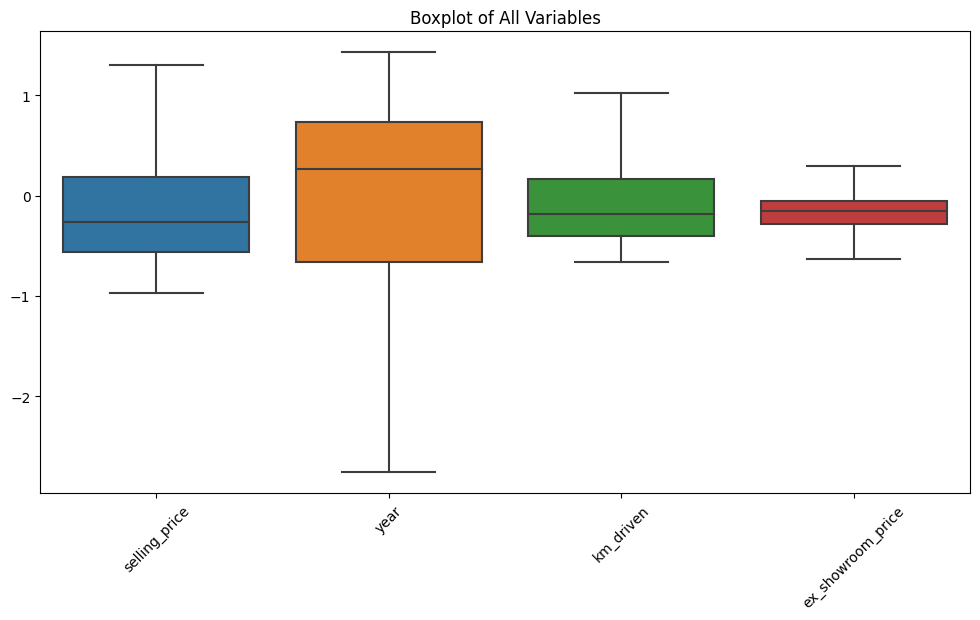

In [16]:
# Boxplots (outlier detection)
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of All Variables")
plt.xticks(rotation=45)
plt.show()

#### Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price. 

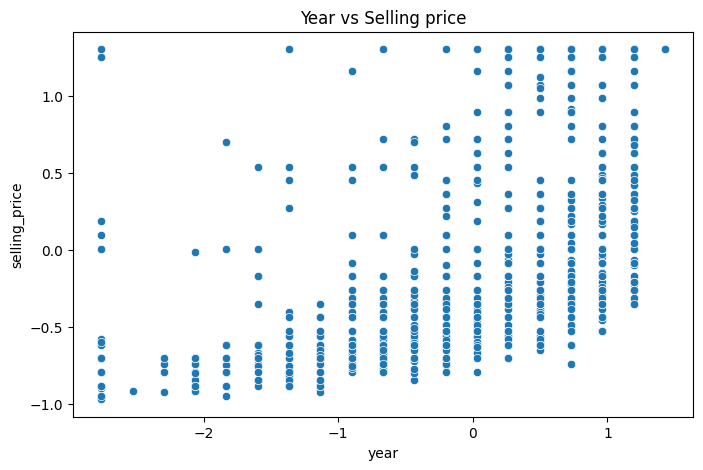

In [17]:
# Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title("Year vs Selling price")
plt.show()

In [24]:
print("""
The scatter plot of year vs. selling_price shows a positive relationship: newer bikes generally 
have higher selling prices. However, there is significant variation within each year, suggesting that other factors 
such as kilometers driven, brand, or ownership type also strongly influence price. Some older premium bikes still retain 
high value, while certain newer models are sold at lower prices, indicating market variability.
""")


The scatter plot of year vs. selling_price shows a positive relationship: newer bikes generally 
have higher selling prices. However, there is significant variation within each year, suggesting that other factors 
such as kilometers driven, brand, or ownership type also strongly influence price. Some older premium bikes still retain 
high value, while certain newer models are sold at lower prices, indicating market variability.



#### Question 8: Question 8: Convert the seller_type column into numeric <br>format using one-hot encoding. Display the first 5 rows of the resulting dataframe.. 

In [19]:
# One-hot encoding the seller_type column
df_encoded = pd.get_dummies(df, columns=["seller_type"], drop_first=False,dtype='int64')

In [25]:
df_encoded.head()

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,1.303567,1.193928,1st owner,-0.659120,-0.149661,0,1
1,Honda Dio,-0.260105,0.728722,1st owner,-0.556405,-0.149661,0,1
2,Royal Enfield Classic Gunmetal Grey,1.303567,0.961325,1st owner,-0.433340,0.294836,0,1
3,Yamaha Fazer FI V 2.0 [2016-2018],0.095275,0.263515,1st owner,-0.220157,0.132094,0,1
4,Yamaha SZ [2013-2014],-0.704331,-0.666899,2nd owner,-0.258917,-0.149661,0,1


#### Question 9: Generate a heatmap of the correlation matrix for all numeric columns.<br> What correlations stand out the most?

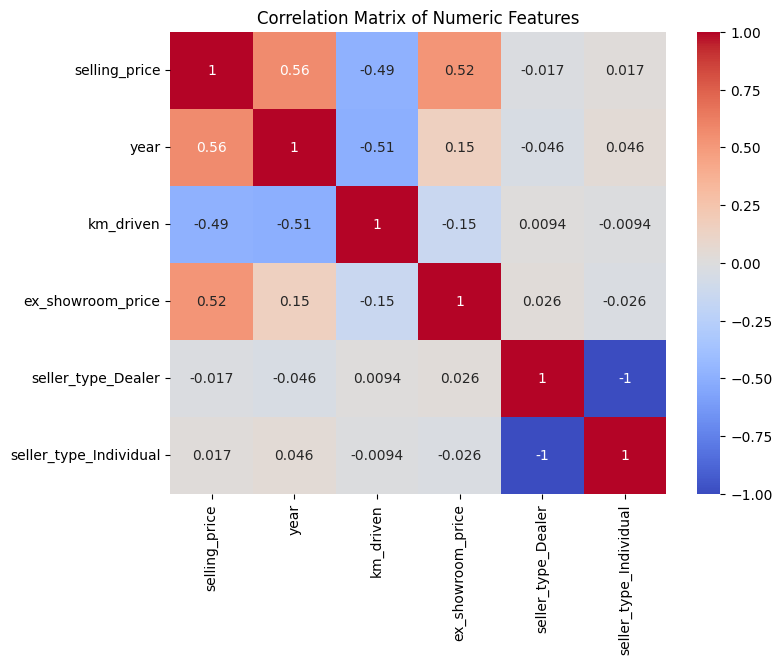

In [21]:
# Correlation matrix

# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [29]:
print("""
# 1. Selling price & Year = 0.56 (positive correlation)
    # Newer bikes tend to have higher selling prices.

# 2. Selling price & Ex-showroom price = 0.52 (positive correlation)
    # Bikes that were originally expensive in the showroom retain higher resale values.

#3 Selling price & Km driven = -0.49 (negative correlation)
    # More kilometers driven reduces the resale price.

#4. Year & Km driven = -0.51 (negative correlation)
    # Newer bikes usually have fewer kilometers driven.
""")


# 1. Selling price & Year = 0.56 (positive correlation)
    # Newer bikes tend to have higher selling prices.

# 2. Selling price & Ex-showroom price = 0.52 (positive correlation)
    # Bikes that were originally expensive in the showroom retain higher resale values.

#3 Selling price & Km driven = -0.49 (negative correlation)
    # More kilometers driven reduces the resale price.

#4. Year & Km driven = -0.51 (negative correlation)
    # Newer bikes usually have fewer kilometers driven.



#### Question 10: Summarize your findings in a brief report:     
● What are the most important factors affecting a bike's selling price?     
● Mention any data cleaning or feature engineering you performed.

In [30]:
print("""
#Year (age of bike) : newer bikes sell for more.

#Ex-showroom price : higher original value means higher resale price.

#Km driven : more usage lowers resale price.
""")


#Year (age of bike) : newer bikes sell for more.

#Ex-showroom price : higher original value means higher resale price.

#Km driven : more usage lowers resale price.



In [ ]:
print("""
# Yes the data has many outliers and 